https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/data

**Salary dependence on work experience**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder


Mounted at /content/drive


In [3]:
path_file = '/content/drive/MyDrive/Colab Notebooks/Colab/Salary/Salary_dataset.csv'
df_data = pd.read_csv(path_file)

df_data


,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df_data.drop('Unnamed: 0', axis=1)

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [5]:
print("Name columns:")
df_data.columns

Name columns:


Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [7]:
df_data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [8]:
print("\nПеревірка на пропущені значення:")
df_data.isnull().sum()


Перевірка на пропущені значення:


,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [9]:
print("\nПеревірка наявності дублікатів:")
df_data.duplicated().sum()


Перевірка наявності дублікатів:


0

In [10]:
df_Salary = df_data['Salary'].value_counts()
df_Salary

,count
Salary,
39344.0,1
46206.0,1
122392.0,1
112636.0,1
116970.0,1
105583.0,1
109432.0,1
113813.0,1
101303.0,1


In [11]:
mean_salary = df_data.groupby('YearsExperience')['Salary'].mean().reset_index()
mean_salary

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,59446.0
8,3.8,57190.0
9,4.0,63219.0


In [12]:
print(mean_salary.dtypes)


YearsExperience    float64
Salary             float64
dtype: object


In [13]:
# import matplotlib.ticker as ticker


# plt.figure(figsize=(10, 6))
# sns.barplot(x='YearsExperience', y='Salary', data=mean_salary, palette='viridis')

# ax = plt.gca()
# plt.xticks(rotation=30)
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

# plt.title('Вплив стажу роботи на Заробітну плату', fontsize=16)
# plt.xlabel('Стаж', fontsize=14, rotation=45)
# plt.ylabel('ЗП', fontsize=14 )

# plt.show()




In [13]:
import plotly.express as px


fig = px.scatter(data_frame=df_data, x="YearsExperience", y="Salary", size="YearsExperience", trendline='ols')
fig.show()

In [14]:
df_corr = df_data.corr()['YearsExperience']
df_corr

,YearsExperience
Unnamed: 0,0.986460
YearsExperience,1.000000
Salary,0.978242


In [15]:
df_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = mean_salary.drop('Salary', axis=1).values
y = mean_salary['Salary'].values

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()


In [19]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [20]:
# Ініціалізуємо модель лінійної регресії
model = LinearRegression()

# Навчаємо модель на даних
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# y_train_pred = model.predict(X_train)
y_test_pred_scaled = model.predict(X_test)

In [22]:
print(X_train.shape)
print(y_train.shape)

(22, 1)
(22,)


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Виводимо коефіцієнти регресії
mae = mean_absolute_error(y_test, y_test_pred_scaled)
mse = mean_squared_error(y_test, y_test_pred_scaled)
r2 = r2_score(y_test, y_test_pred_scaled)

# Виведення метрик
print(f"Test MAE (масштабовані дані): {mae:.4f}")
print(f"Test MSE (масштабовані дані): {mse:.4f}")
print(f"Test R² (масштабовані дані): {r2:.4f}")

# Виведення коефіцієнтів моделі
coefficients = model.coef_
intercept = model.intercept_

# Виведення коефіцієнтів
print(f"Коефіцієнти: {coefficients.round(4)}")
print(f"Вільний член (інтерсепт): {intercept.round(4)}")


Test MAE (масштабовані дані): 0.1735
Test MSE (масштабовані дані): 0.0451
Test R² (масштабовані дані): 0.9580
Коефіцієнти: [0.973]
Вільний член (інтерсепт): 0.0022


***Виконаємо зворотнє масштабування.***

In [27]:
# Зворотнє масштабування
y_pred_original = scaler_y.inverse_transform(y_test_pred_scaled.reshape(-1, 1)).ravel()

# Обчислення метрик на оригінальній шкалі
mae = mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred_original)
mse = mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred_original)
r2 = r2_score(scaler_y.inverse_transform(y_test.reshape(-1, 1)), y_pred_original)

print(f"Test MAE: {mae:.4f}, Test MSE: {mse:.4f}, Test R²: {r2:.4f}")

Test MAE: 4755.6188, Test MSE: 33911809.0964, Test R²: 0.9580


In [28]:
coefficients = model.coef_
intercept = model.intercept_

print(f"Коефіцієнти: {coefficients.round(4)}")
print(f"Вільний член (intersept): {intercept.round(4)}")

Коефіцієнти: [0.973]
Вільний член (intersept): 0.0022


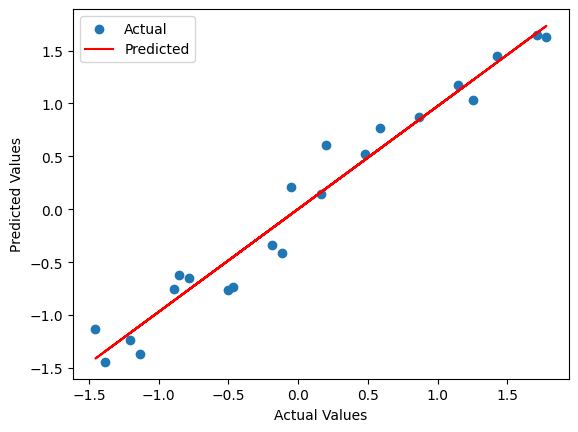

In [29]:
plt.scatter(X_train,y_train, label='Actual')
plt.plot(X_train,model.predict(X_train),color='red', label='Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Аналіз результатів моделі лінійної регресії

Розуміння метрик

MAE (Mean Absolute Error): Середнє абсолютне відхилення. Показує середню абсолютну різницю між прогнозованими та фактичними значеннями. Чим менше значення MAE, тим точніші прогнози.

MSE (Mean Squared Error): Середньоквадратична помилка. Подібна до MAE, але більше наголошує на великих відхиленнях.

R² (R-квадрат): Коефіцієнт детермінації. Показує, яка частка дисперсії залежної змінної пояснюється моделлю. Чим ближче R² до 1, тим краще модель підходить до даних.

Інтерпретація результатів
Ваші результати вказують на досить хорошу модель:

Високий R²: Значення R² дорівнює 0.9580, що означає, що модель пояснює близько 95.8% дисперсії залежної змінної (заробітної плати) за допомогою незалежної змінної (стажу роботи). Це дуже хороший показник.
Низькі MAE та MSE: Низькі значення MAE та MSE свідчать про те, що модель робить досить точні прогнози.
Коефіцієнти моделі:

Коефіцієнт при стажі роботи (0.973): Це означає, що при збільшенні стажу роботи на 1 одиницю, заробітна плата в середньому зростає на 0.973 одиниці (з урахуванням масштабування даних). Позитивний знак коефіцієнта вказує на пряму залежність між стажем і заробітною платою: чим більше стаж, тим вища зарплата.
Вільний член (0.0022): Це базове значення заробітної плати, коли стаж дорівнює нулю. Звичайно, це значення може не мати практичного сенсу, оскільки зазвичай люди починають працювати не з нульовим стажем.
Вісновок
На основі отриманих результатів можна зробити висновок, що існує сильна позитивна лінійна залежність між стажем роботи та рівнем заробітної плати. Модель лінійної регресії, яку ви побудували, досить добре описує цю залежність.

Можливі подальші дослідження:

Аналіз залишків: Перевірити, чи залишки моделі відповідають припущенням лінійної регресії (нормальність, гомоскедастичність).
Включення додаткових змінних: Додати інші фактори, які можуть впливати на рівень заробітної плати (наприклад, освіта, галузь, регіон).
Перевірка на нелінійні залежності: Якщо є підозра, що залежність між стажем і заробітною платою не є строго лінійною, можна спробувати використовувати нелінійні моделі.
Перевірка на наявність виключень: Проаналізувати точки даних, які сильно відхиляються від загальної тенденції (виключення).
Застереження:

Масштабування даних: Оскільки ви використовували масштабовані дані, інтерпретація коефіцієнтів моделі потребує додаткової обережності. Для отримання більш зрозумілих результатів можна повернути коефіцієнти до вихідного масштабу.
Причинно-наслідковий зв'язок: Хоча модель показує статистично значущу залежність між стажем і заробітною платою, це не означає, що збільшення стажу обов'язково призведе до збільшення заробітної плати. Можуть бути й інші фактори, які впливають на рівень заробітної плати.
Загалом, отримані результати є обнадійливими і свідчать про те, що модель лінійної регресії є ефективним інструментом для аналізу залежності між стажем роботи і заробітною платою.

**Середня квадратична помилка (MSE)**

Визначення: вимірює середню квадратичну різницю між прогнозованими та фактичними значеннями.
Інтерпретація: нижчий MSE вказує на кращу відповідність моделі.
У вашому випадку:
train_rme: середня квадратична помилка моделі на даних навчання становить 28 222 681,497.
test_rme: середня квадратична помилка моделі на основі даних тестування становить 33 911 809,096.

R-квадрат (R²)
Визначення: вимірює частку дисперсії залежної змінної, яка пояснюється незалежною змінною(ями).
Інтерпретація: значення R², ближче до 1, означає кращу відповідність моделі.
У вашому випадку:
train_r2: Модель пояснює 96,15% дисперсії даних навчання.
test_r2: Модель пояснює 95,79% відхилень у даних тестування.

Детальний аналіз результатів лінійної регресії
Розуміння виведених значень
Intercept (Перехоплення):

Значення 5.2875: Означає, що якщо співробітник має нульовий стаж, то його прогнозована зарплата складатиме приблизно 5.2875 одиниць (в залежності від одиниць вимірювання зарплати в ваших даних). Звісно, в реальному житті не буває співробітників з нульовим стажем, але це значення дає нам базовий рівень зарплати.
Coefficients (Коефіцієнти):

1.63498821: Це коефіцієнт при ознаці "YearsExperience". Він показує, що в середньому зарплата зростає на 1.6349 одиниць при збільшенні стажу на один рік. Іншими словами, кожен додатковий рік стажу пов'язаний зі збільшенням зарплати приблизно на 1635 одиниць.
MAE, MSE, R²:

MAE (Mean Absolute Error): Середня абсолютна похибка. Показує, наскільки в середньому наші прогнози відрізняються від фактичних значень зарплати. Чим менше значення, тим точніші прогнози.
MSE (Mean Squared Error): Середньоквадратична похибка. Подібна до MAE, але більше наголошує на великих похибках.
R² (Коефіцієнт детермінації): Показує, яка частка дисперсії цільової змінної (зарплати) пояснюється нашою моделлю. Значення 0.9884 на тренувальній вибірці та 0.9615 на тестовій вибірці означає, що наша модель досить добре пояснює залежність зарплати від стажу.
Prediction train та Prediction test:

Це масиви прогнозованих значень зарплати для тренувальної та тестової вибірок відповідно. Ви можете порівняти ці значення з фактичними значеннями зарплати, щоб оцінити якість прогнозів.
Висновок
На основі отриманих результатів можна зробити такі висновки:

Існує сильний позитивний зв'язок між стажем роботи та зарплатою: Кожен додатковий рік стажу суттєво впливає на зростання зарплати.
Модель лінійної регресії добре описує дані: Високий коефіцієнт детермінації (R²) свідчить про те, що наша модель досить точно прогнозує зарплату на основі стажу.
Модель узагальнюється на нові дані: Невелика різниця між результатами на тренувальній та тестовій вибірках свідчить про те, що модель не перенавчається і здатна робити прогнози на нових даних.
Подальші кроки
Візуалізація: Можна побудувати графік, що відображає фактичні та прогнозовані значення зарплати, щоб візуально оцінити якість моделі.
Аналіз залишків: Перевірити, чи залишки моделі (різниця між фактичними та прогнозованими значеннями) розподілені випадковим чином.
Розширення моделі: Додати додаткові ознаки (наприклад, освіта, галузь), щоб покращити точність прогнозування.
Інші моделі: Порівняти результати лінійної регресії з іншими моделями машинного навчання, такими як дерево рішень або випадковий ліс.
Важливо пам'ятати:

Цей аналіз базується на припущенні, що лінійна регресія є адекватним методом для моделювання залежності зарплати від стажу.
Для більш складних задач може знадобитися використовувати більш складні моделі або методи.
Завжди варто перевіряти припущення моделі та інтерпретувати результати з обережністю.